In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
fraud = pd.read_csv("Fraud_check.csv")


In [3]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [24]:
fraud

,undergrad,marital,population,experience,urban,income
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


In [4]:
fraud.describe

<bound method NDFrame.describe of     Undergrad Marital.Status  Taxable.Income  City.Population  \
0          NO         Single           68833            50047   
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
..        ...            ...             ...              ...   
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work.Experience Urban  
0                 10   YES  
1                 18   YES  
2                 30   YES  
3                 15   YES  
4                 28    NO  
..         

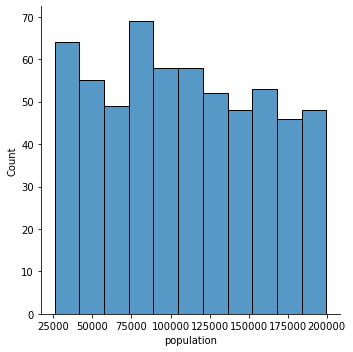

In [25]:
import seaborn as sns
sns.displot(fraud['population'])

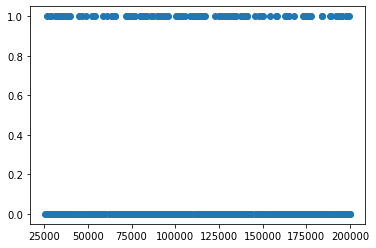

In [32]:
plt.scatter(x=fraud['population'],y=fraud.income)

(array([476.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 124.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

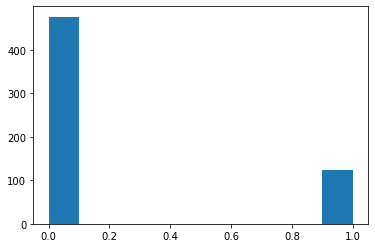

In [33]:
plt.hist(fraud['income'])

(array([47., 50., 54., 67., 77., 55., 47., 52., 58., 93.]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]),
 <BarContainer object of 10 artists>)

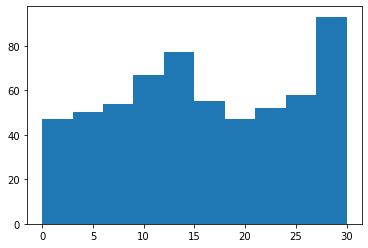

In [34]:
plt.hist(fraud['experience'])

In [5]:
fraud["income"]="<=30000"
fraud.loc[fraud["Taxable.Income"]>=30000,"income"]="Good"
fraud.loc[fraud["Taxable.Income"]<=30000,"income"]="Risky"

In [6]:
##Droping the Taxable income variable
fraud.drop(["Taxable.Income"],axis=1,inplace=True)

fraud.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","City.Population":"population","Work.Experience":"experience","Urban":"urban"},inplace=True)


In [7]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in fraud.columns:
    if fraud[column_name].dtype == object:
        fraud[column_name] = le.fit_transform(fraud[column_name])
    else:
        pass

In [8]:
##Splitting the data into featuers and labels
features = fraud.iloc[:,0:5]
labels = fraud.iloc[:,5]

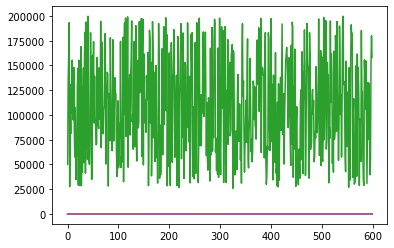

In [35]:
plt.plot(features)

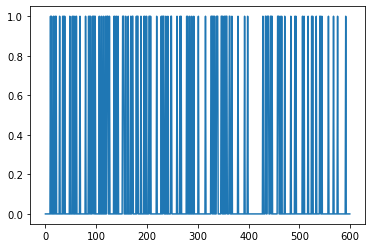

In [37]:
plt.plot(labels)

(array([[600.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [600.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,  58.,  73.,  72.,  72.,  74.,  69.,  63.,  54.,  65.],
        [600.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [600.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([     0. ,  19977.8,  39955.6,  59933.4,  79911.2,  99889. ,
        119866.8, 139844.6, 159822.4, 179800.2, 199778. ]),
 <a list of 5 BarContainer objects>)

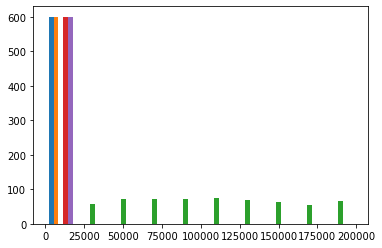

In [41]:
plt.hist(features)

In [9]:
## Collecting the column names
colnames = list(fraud.columns)
predictors = colnames[0:5]
target = colnames[5]

In [10]:
##Splitting the data into train and test

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.2,stratify = labels)


In [11]:
##Model building
from sklearn.ensemble import RandomForestClassifier as RF
model = RF(n_jobs = 3,n_estimators = 15, oob_score = True, criterion = "entropy")
model.fit(x_train,y_train)

import warnings
warnings.filterwarnings('ignore')

In [12]:

##Predictions on train data
prediction = model.predict(x_train)


In [13]:
# For accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train,prediction)
accuracy*100

98.75

In [14]:
np.mean(prediction == y_train)*100

98.75

In [15]:
pred_test = model.predict(x_test)

In [16]:
acc_test =accuracy_score(y_test,pred_test)

In [17]:
pred_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [18]:
acc_test*100

75.83333333333333

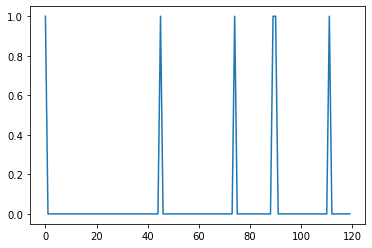

In [50]:
plt.plot(pred_test)